In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle

#### Top 100 Clients for Marketing Outreach

In [2]:
with open('Pickle_Files/Revenue_MF.pkl', 'rb') as f5:
     mutual_fund= pickle.load(f5)
with open('Pickle_Files/Revenue_CC.pkl', 'rb') as f6:
     credit_card= pickle.load(f6)
with open('Pickle_Files/Revenue_CL.pkl', 'rb') as f7:
     consumer_loan= pickle.load(f7)

In [3]:
# Extract top 100 clients and their respective product
marketing_clients = pd.concat([mutual_fund, credit_card, consumer_loan])

marketing_clients.sort_values(by=['Revenue'], ascending=False,inplace=True)

marketing_clients.drop_duplicates(subset='Client', keep='first',inplace=True)

top_100_revenues = marketing_clients.head(100)

display(top_100_revenues['Product'].value_counts())
top_100_revenues

Product
CL    51
CC    49
Name: count, dtype: int64

,Client,Revenue_MF,Product,Revenue
171,1460,NaN,CC,147.459793
548,1071,NaN,CC,128.569793
90,84,NaN,CC,121.840761
452,1162,NaN,CC,95.286093
459,1389,NaN,CC,95.090350
...,...,...,...,...
256,1544,NaN,CL,8.519304
162,1096,NaN,CL,8.497968
514,57,NaN,CC,8.490932
412,1586,NaN,CL,8.400464


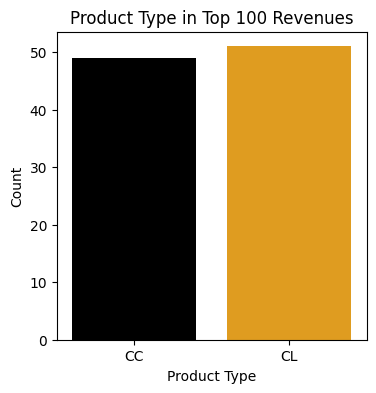

In [4]:

warnings.filterwarnings("ignore")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.countplot(x='Product', data=top_100_revenues, palette=["black", "orange", "red"], ax=ax1)
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Count')
ax1.set_title('Product Type in Top 100 Revenues')

plt.show()

In [5]:
# Potential Revenue Generated

print(f'Potential revenue to be generated: { int(top_100_revenues["Revenue"].sum())} EUR')

Potential revenue to be generated: 2475 EUR


In [6]:
output_folder_path = 'Excel_files'

# Generating a new excel file with the corresponding excel folder
output_excel_path = os.path.join(output_folder_path, 'Client_Revenue.xlsx')

top_100_revenues.to_excel(output_excel_path, index=False)